In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2 as cv
import os
import seaborn as sns
import pandas as pd
from skimage import filters
from skimage.filters import sobel
from skimage.filters.rank import entropy
from skimage.filters import roberts
from skimage.filters import scharr
from skimage.filters import prewitt
from skimage.morphology import disk

In [2]:
print(os.listdir("C:/Users/Emanuel de la Cruz E/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Thesis/Images/kaggle/two_classes"))

['Test', 'Train', 'Validation']


In [3]:
#Capture images and labels into arrays.
#Start by creating empty lists.
train_images = []
train_labels = []
for directory_path in glob.glob("C:/Users/Emanuel de la Cruz E/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Thesis/Images/kaggle/two_classes/Train/*"):
    label = directory_path.split("/")[-1]    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv.imread(img_path, cv.IMREAD_COLOR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [15]:
print(np.shape(train_images))
print(np.shape(train_labels))

(762, 128, 128, 3)
(762,)


In [4]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("C:/Users/Emanuel de la Cruz E/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Thesis/Images/kaggle/two_classes/Test/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv.imread(img_path, cv.IMREAD_COLOR)
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [17]:
print(np.shape(test_images))
print(np.shape(test_labels))

(164, 128, 128, 3)
(164,)


In [5]:
validation_images = []
validation_labels = [] 
for directory_path in glob.glob("C:/Users/Emanuel de la Cruz E/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Thesis/Images/kaggle/two_classes/Validation/*"):
    label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        img = cv.imread(img_path, cv.IMREAD_COLOR)
        validation_images.append(img)
        validation_labels.append(label)
        
validation_images = np.array(test_images)
validation_labels = np.array(test_labels)

In [19]:
print(np.shape(validation_images))
print(np.shape(validation_labels))

(164, 128, 128, 3)
(164,)


In [6]:
# Encode labels from text (folder names) to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(validation_labels)
validation_labels_encoded = le.transform(validation_labels)

In [21]:
print(train_labels_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [7]:
#Split data into test and train datasets
x_train, y_train, x_test, y_test, x_validation, y_validation = train_images, train_labels_encoded, test_images, test_labels_encoded, validation_images, validation_labels_encoded

In [8]:
# Normalize pixel values to between 0 and 1
x_train, x_test, x_validation = x_train / 255.0, x_test / 255.0, x_validation / 255.0

In [24]:
print(np.shape(x_train))

(762, 128, 128, 3)


In [9]:
print(x_train.shape[0])

762


In [29]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    
    image_dataset = pd.DataFrame()
    
    for image in range(dataset.shape[0]):  #iterate through each file 
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        input_img = dataset[image, :,:,:]
        img = np.copy(input_img)
        
        
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        
        Gray_copy = np.copy(img_gray)
        Mean_copy = (1/3)*np.copy(img[:,:,0]) + (1/3)*np.copy(img[:,:,1]) + (1/3)*np.copy(img[:,:,2])
        Mean_copy = Mean_copy.astype(np.uint8)
        L_med_by = (np.copy(img[:,:,0]) + np.copy(img[:,:,1])) - 2*np.copy(img[:,:,0])
        L_med_by = L_med_by.astype(np.uint8)
        L_med_rg = (np.copy(img[:,:,2]) - np.copy(img[:,:,1]))
        L_med_rg = L_med_rg.astype(np.uint8)
        
        
        img_gray_med_blur = cv.medianBlur(Gray_copy, 3)        
        img_mean_med_blur = cv.medianBlur(Mean_copy, 3)
        img_by_med_blur = cv.medianBlur(L_med_by, 3)
        img_rg_med_blur = cv.medianBlur(L_med_rg, 3)
        
        
        thresh_mean_med, img_mean_med_ot = cv.threshold(img_mean_med_blur, 0,255, cv.THRESH_OTSU)
        thresh_gray_median, img_gray_med_ot = cv.threshold(img_gray_med_blur, 0,255, cv.THRESH_OTSU)
        thresh_by_med, img_by_med_ot = cv.threshold(img_by_med_blur, 0,255, cv.THRESH_OTSU)
        thresh_rg_med, img_rg_med_ot = cv.threshold(img_rg_med_blur, 0,255, cv.THRESH_OTSU)
        
        
        des_mean_med = np.std(img_mean_med_blur)
        des_gray_med = np.std(img_gray_med_blur)
        des_by_med = np.std(img_by_med_blur)
        des_rg_med = np.std(img_rg_med_blur)
        
        
        img_mean_med_entropy = entropy(img_mean_med_blur, disk(5))
        img_gray_med_entropy = entropy(img_gray_med_blur, disk(5))
        img_by_med_entropy = entropy(img_by_med_blur, disk(5))
        img_rg_med_entropy = entropy(img_rg_med_blur, disk(5))
        
        
        img_mean_med_canny = cv.Canny(img_mean_med_blur,thresh_mean_med-3*des_mean_med,thresh_mean_med+3*des_mean_med)
        img_gray_med_canny = cv.Canny(img_gray_med_blur,thresh_gray_med-3*des_gray_med,thresh_gray_med+3*des_gray_med)
        img_by_med_canny = cv.Canny(img_by_med_blur,thresh_by_med-3*des_by_med,thresh_by_med+3*des_by_med)
        img_rg_med_canny = cv.Canny(img_rg_med_blur,thresh_rg_med-3*des_rg_med,thresh_rg_med+3*des_rg_med)
        
        
        img_gray = Gray_copy.reshape(-1)
        df[gray] = img_gray       
        img_mean = Mean_copy.reshape(-1)
        df[mean] = img_mean
        img_gray_med_blur = img_gray_med_blur.reshape(-1)
        df[gray_med_blur] = img_gray_med_blur
        img_mean_med_blur = img_mean_med_blur.reshape(-1)
        df[mean_med_blur] = img_mean_med_blur
        img_mean_med_ot = img_mean_med_ot.reshape(-1)
        df[Ot_mean_med_blur] = img_mean_med_ot
        img_gray_med_ot = img_gray_med_ot.reshape(-1)
        df[Ot_gray_med_blur] = img_gray_med_ot
        img_mean_med_entropy = img_mean_med_entropy.reshape(-1)
        df[entropy_Mean_med_blur] = img_mean_med_entropy
        img_gray_med_entropy = img_gray_med_entropy.reshape(-1)
        df[entropy_Gray_med_blur] = img_gray_med_entropy        
        img_mean_med_canny = img_mean_med_canny.reshape(-1)
        df[canny_Mean_med_blur] = img_mean_med_canny
        img_gray_med_canny = img_gray_med_canny.reshape(-1)
        df[canny_Gray_med_blur] = img_gray_med_canny
        
        
        img_b_med_blur = cv.medianBlur(B_copy, 3)
        img_g_med_blur = cv.medianBlur(G_copy, 3)
        img_r_med_blur = cv.medianBlur(R_copy, 3)
        
        
        thresh_b_med, img_b_med_ot = cv.threshold(img_b_med_blur, 0,255, cv.THRESH_OTSU)
        thresh_g_med, img_g_med_ot = cv.threshold(img_g_med_blur, 0,255, cv.THRESH_OTSU)
        thresh_r_med, img_r_med_ot = cv.threshold(img_r_med_blur, 0,255, cv.THRESH_OTSU)
        
        
        des_b_med = np.std(img_b_med_blur)
        des_g_med = np.std(img_g_med_blur)
        des_r_med = np.std(img_r_med_blur)
        
        img_b_med_entropy = entropy(img_b_med_blur, disk(5))
        img_g_med_entropy = entropy(img_g_med_blur, disk(5))
        img_r_med_entropy = entropy(img_r_med_blur, disk(5))
        
        img_b_med_canny = cv.Canny(img_b_med_blur,thresh_b_med-3*des_b_med,thresh_b_med+3*des_b_med)
        img_g_med_canny = cv.Canny(img_g_med_blur,thresh_g_med-3*des_g_med,thresh_g_med+3*des_g_med)
        img_r_med_canny = cv.Canny(img_r_med_blur,thresh_r_med-3*des_r_med,thresh_r_med+3*des_r_med)
        
        img_b = B_copy.reshape(-1)
        df[blue_channel] = img_b
        
        img_g = G_copy.reshape(-1)
        df[green_channel] = img_g
        
        img_r = R_copy.reshape(-1)
        df[red_channel] = img_r
        
        img_b_med_blur = img_b_med_blur.reshape(-1)
        df[b_med_blur] = img_b_med_blur
        
        img_g_med_blur = img_g_med_blur.reshape(-1)
        df[g_med_blur] = img_g_med_blur
        
        img_r_med_blur = img_r_med_blur.reshape(-1)
        df[r_med_blur] = img_r_med_blur
        
        img_b_med_ot = img_b_med_ot.reshape(-1)
        df[Ot_b_med_blur] = img_b_med_ot
        
        img_g_med_ot = img_g_med_ot.reshape(-1)
        df[Ot_g_med_blur] = img_g_med_ot
        
        img_r_med_ot = img_r_med_ot.reshape(-1)
        df[Ot_r_med_blur] = img_r_med_ot
        
        img_b_med_entropy = img_b_med_entropy.reshape(-1)
        df[entropy_B_med_blur] = img_b_med_entropy
        
        img_g_med_entropy = img_g_med_entropy.reshape(-1)
        df[entropy_G_med_blur] = img_g_med_entropy
        
        img_r_med_entropy = img_r_med_entropy.reshape(-1)
        df[entropy_R_med_blur] = img_r_med_entropy
        
        img_b_med_canny = img_b_med_canny.reshape(-1)
        df[canny_B_med_blur] = img_b_med_canny
        
        img_g_med_canny = img_g_med_canny.reshape(-1)
        df[canny_G_med_blur] = img_g_med_canny
        
        img_r_med_canny = img_r_med_canny.reshape(-1)
        df[canny_R_med_blur] = img_r_med_canny
        
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
    #Add feature extractors, e.g. edge detection, smoothing, etc. 

        num = 1
        for channel in range(3):
            entropy_label = 'Entropy' + str(num)
            pixel_value_label = 'Pixel_Value' + str(num)
            sobel_label = 'Edge_Sobel' + str(num)
            #med_blur_label = 'Med_blur' + str(num)

            img2 = img[:,:,channel]
    
            img_blur = cv.medianBlur(img2, 3)
    
            entropy_img = entropy(img_blur, disk(5))
            entropy_fil = entropy_img.reshape(-1)
          
            sobel_img = sobel(img_blur)
            sobel_fil = sobel_img.reshape(-1)

            canny_img = cv.Canny(img_blur,thresh_Mean_Median-3*des_Mean_Median,thresh_Mean_Median+3*des_Mean_Median)  
        
            pixel_values = img2.reshape(-1)

            #med_blur = cv.medianBlur(img2, 3)
            #median_fil = med_blur.reshape(-1)
          
            df[entropy_label] = entropy_fil
            df[pixel_value_label] = pixel_values
            df[sobel_label] = sobel_fil
            #df[med_blur_label] = median_fil

            num += 1

            image_dataset = image_dataset.append(df)
        
    return image_dataset

        # FEATURE 2 - Bunch of Gabor filter responses


        #Gabor filter parameters
#	      ksize = 100 
#	      phi = 0
#	      num = 1
#        kernels = []
#        for theta in range(2):
#          theta = theta/4.*np.pi
#          for sigma in (3,5):
#            for lamda in np.arange(0, np.pi, np.pi/4.):
#              for gamma in (0.05, 0.5):
#                gabor_label = 'Gabor'+ str(num)
#                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
#                kernels.append(kernel)
#                fimg = cv2.filter2D(img, cv.CV_8UC3, kernel)
#                filtered_img = fimg.reshape(-1)
#                df[gabor_label] = filtered_img
#                num += 1
        
       
        #Generate Gabor features
#        ksize=9
#        phi = 0
#        num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
#        kernels = []
#        for theta in range(2):   #Define number of thetas
#            theta = theta / 4. * np.pi
#            for sigma in (3, 5):  #Sigma with 1 and 3
#              lamda = np.pi/4
#              gamma = 0.5
#              gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label) 
#              kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
#              kernels.append(kernel)
                  #Now filter the image and add values to a new column 
#              fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
#              filtered_img = fimg.reshape(-1)
#              df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                  #print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
#              num += 1  #Increment for gabor column label
                

        
	      #Entropy can be used as texture visualization filter
##        entropy_img = entropy(img, disk(5))
##        entropy1 = entropy_img.reshape(-1)
##        df['Entropy'] = entropy1

        #Median blur
##        med_blur = cv2.medianBlur(img, 3)
##        Median_blur1 = med_blur.reshape(-1)
##        df['Median Blur'] = Median_blur1

        #Gaussian
#        blur = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
#        Gaussian1 = blur.reshape(-1)
#        df['Gaussian'] = Gaussian1
        
        #Append features from current image to the dataset
#        image_dataset = image_dataset.append(df)
        
#    return image_dataset

In [30]:
####################################################################
#Extract features from training images
image_features = feature_extractor(x_train)

<ipython-input-30-489a0da672d8>:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  image_features = feature_extractor(x_train)


In [ ]:
#Exportación de información
#image_features.to_csv("/content/drive/MyDrive/Thesis/Datasets/train_reduced_set_features.csv")

In [31]:
image_features

,Entropy1,Pixel_Value1,Edge_Sobel1,Entropy2,Pixel_Value2,Edge_Sobel2,Entropy3,Pixel_Value3,Edge_Sobel3
0,2.150295,0.015686,0.002192,NaN,NaN,NaN,NaN,NaN,NaN
1,2.285655,0.015686,0.006278,NaN,NaN,NaN,NaN,NaN,NaN
2,2.428732,0.007843,0.003535,NaN,NaN,NaN,NaN,NaN,NaN
3,2.436959,0.011765,0.003100,NaN,NaN,NaN,NaN,NaN,NaN
4,2.449660,0.011765,0.005280,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16379,3.159080,0.356863,0.004902,3.290550,0.478431,0.004902,3.585399,0.568627,0.004902
16380,3.181933,0.356863,0.005546,3.310884,0.478431,0.005546,3.573761,0.568627,0.005546
16381,3.122964,0.360784,0.008769,3.116775,0.482353,0.008769,3.381577,0.572549,0.008769
16382,2.965527,0.360784,0.007904,2.965527,0.482353,0.007904,3.163042,0.564706,0.010784


In [32]:
image_features = image_features.dropna()

In [33]:
print(np.shape(image_features))

(12484608, 9)


In [34]:
#Reshape to a vector for Random Forest / SVM training
n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_for_RF = np.reshape(image_features, (x_train.shape[0], -1))  #Reshape to #images, features

In [35]:
print(np.shape(X_for_RF))

(762, 147456)


In [36]:
print(np.shape(y_train))

(762,)


In [37]:
#Define the classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

#Can also use SVM but RF is faster and may be more accurate.
#from sklearn import svm
#SVM_model = svm.SVC(decision_function_shape='ovo')  #For multiclass classification
#SVM_model.fit(X_for_RF, y_train)

In [38]:
# Fit the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [39]:
#Predict on Test data
#Extract features from test data and reshape, just like training data
test_features = feature_extractor(x_test)
test_features = test_features.dropna()
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

<ipython-input-39-d9f7e095bcb7>:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  test_features = feature_extractor(x_test)


In [40]:
#Predict on test
test_prediction = RF_model.predict(test_for_RF)
#Inverse le transform to get original label back. 
test_prediction = le.inverse_transform(test_prediction)

In [ ]:
#print(np.shape(test_prediction))
test_prediction

array(['1', '1', '0', '4', '2', '4', '2', '3', '1', '2', '3', '1', '0',
       '1', '4', '0', '4', '4', '3', '0', '0', '3', '0', '4', '3', '0',
       '1', '0', '0', '1', '1', '3', '2', '0', '2', '0', '4', '2', '2',
       '2', '2', '4', '1', '2', '2', '4', '4', '4', '3', '4', '0', '4',
       '4', '2', '2', '3', '0', '1', '2', '0', '0', '3', '1', '4', '2',
       '2', '2', '3', '4', '2', '4', '0', '2', '2', '2'], dtype='<U1')

In [ ]:
#Predict on Validation data
#Extract features from test data and reshape, just like training data
validation_features = feature_extractor(x_validation)
validation_features = np.expand_dims(validation_features, axis=0)
validation_for_RF = np.reshape(validation_features, (x_validation.shape[0], -1))

In [ ]:
#Predict on test
validation_prediction = RF_model.predict(validation_for_RF)
#Inverse le transform to get original label back. 
validation_prediction = le.inverse_transform(validation_prediction)

In [41]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, test_prediction))

Accuracy =  0.5792682926829268


<AxesSubplot:>

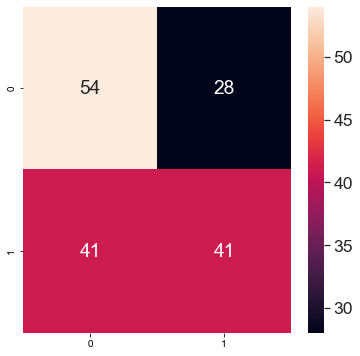

In [42]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)

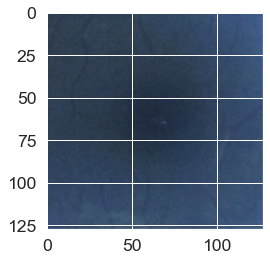

In [43]:
#Check results on a few random images
import random
n=random.randint(0, x_test.shape[0]-1) #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)

In [46]:
#Extract features and reshape to right dimensions
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features = feature_extractor(input_img)
input_img_features = np.expand_dims(input_img_features, axis=0)
input_img_for_RF = np.reshape(input_img_features, (input_img.shape[0], -1))
#Predict
img_prediction = RF_model.predict(input_img_for_RF)
img_prediction = le.inverse_transform([img_prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", img_prediction)
print("The actual label for this image is: ", test_labels[n])

<ipython-input-46-2f4cdcc01bd1>:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  input_img_features = feature_extractor(input_img)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').